In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import pickle

In [3]:
import sys
sys.path.append('../code/')

from common import APPLIANCES_ORDER, contri

(0, 110)

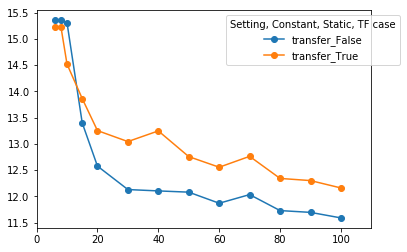

In [23]:
out = pickle.load(open('../predictions/lr-tf-Austin-SanDiego-HBAS.pkl','r'))
out
for constant in ['False', 'True']:
    for transfer in ['transfer']:
        algo = "{}_{}".format(transfer, constant)
        error = (pd.DataFrame(out[constant][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
        error.plot(label=algo, marker='o')
plt.legend(bbox_to_anchor=(1.1, 1), title='Setting, Constant, Static, TF case')
plt.xlim((0, 110))
# plt.savefig("../results/case-4-comparison.pdf", bbox_inches="tight", dpi=300, format='pdf')

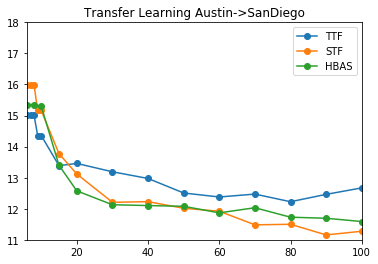

In [39]:
HBAS_out = pickle.load(open('../predictions/lr-tf-Austin-SanDiego-HBAS.pkl','r'))
out = pickle.load(open('../predictions/lr-tf-Austin-SanDiego-all.pkl','r'))
out

# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
# ax = axes.flatten()
# count = 0


for case in [2, 4]:
    for constant in ['False']:
        for static in ['False']:
            for transfer in ['transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(label=algo, marker='o', ylim=(11,18))
    
for constant in ['False']:
    for transfer in ['transfer']:
        algo = "{}_{}".format(transfer, constant)
        error = (pd.DataFrame(HBAS_out[constant][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
        error.plot(label=algo, marker='o', xlim=(6,100))
# plt.xlim(5, 20)

plt.legend(["TTF", 'STF', 'HBAS'])
plt.title("Transfer Learning Austin->SanDiego")
plt.savefig("../results/comparison_HBAS_transfer_false.pdf", bbox_inches="tight", dpi=300, format='pdf')